# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "aryansaurabhbhardwaj"
kaggle_key = "0d22002e6513ecac3e90615ebc3a7f2c"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 76.5MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [25]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv',  parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
ignored_columns = ["casual", "registered"]

In [11]:

predictor = TabularPredictor(label="count",  problem_type = 'regression', eval_metric='root_mean_squared_error',
                             learner_kwargs={'ignored_columns': ignored_columns}).fit(train_data=train,
                                                 time_limit=600,
                                                 presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20231009_082030/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20231009_082030/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   209.20 GB / 242.49 GB (86.3%)
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12023.54 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_i

### Review AutoGluon's training run with ranking of models that did the best.

In [12]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.143797      27.647271  550.962824                0.003927           0.591700            3       True         12
1   RandomForestMSE_BAG_L2  -53.470508      21.814819  401.278399                0.726344          46.027311            2       True         11
2          LightGBM_BAG_L2  -55.015730      22.106045  425.251462                1.017570          70.000375            2       True         10
3        LightGBMXT_BAG_L2  -60.488276      25.899431  434.343439                4.810956          79.092351            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061       0.080244    0.062493                0.080244           0.062493            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.083196    1.821720         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.81763877449262,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble

In [13]:
# Leaderboard dataframe
fit_result_df = pd.DataFrame(predictor.leaderboard(silent=True))
fit_result_df.head(10)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-53.143797,27.647271,550.962824,0.003927,0.591700,3,True,12
1,RandomForestMSE_BAG_L2,-53.470508,21.814819,401.278399,0.726344,46.027311,2,True,11
2,LightGBM_BAG_L2,-55.015730,22.106045,425.251462,1.017570,70.000375,2,True,10
3,LightGBMXT_BAG_L2,-60.488276,25.899431,434.343439,4.810956,79.092351,2,True,9
4,KNeighborsDist_BAG_L1,-84.125061,0.080244,0.062493,0.080244,0.062493,1,True,2
5,WeightedEnsemble_L2,-84.125061,0.083196,1.821720,0.002952,1.759227,2,True,8
6,KNeighborsUnif_BAG_L1,-101.546199,0.076693,0.070581,0.076693,0.070581,1,True,1
7,RandomForestMSE_BAG_L1,-116.548359,0.964359,16.530497,0.964359,16.530497,1,True,5
8,ExtraTreesMSE_BAG_L1,-124.600676,0.600118,10.698495,0.600118,10.698495,1,True,7
9,CatBoost_BAG_L1,-130.817639,0.221448,182.466083,0.221448,182.466083,1,True,6


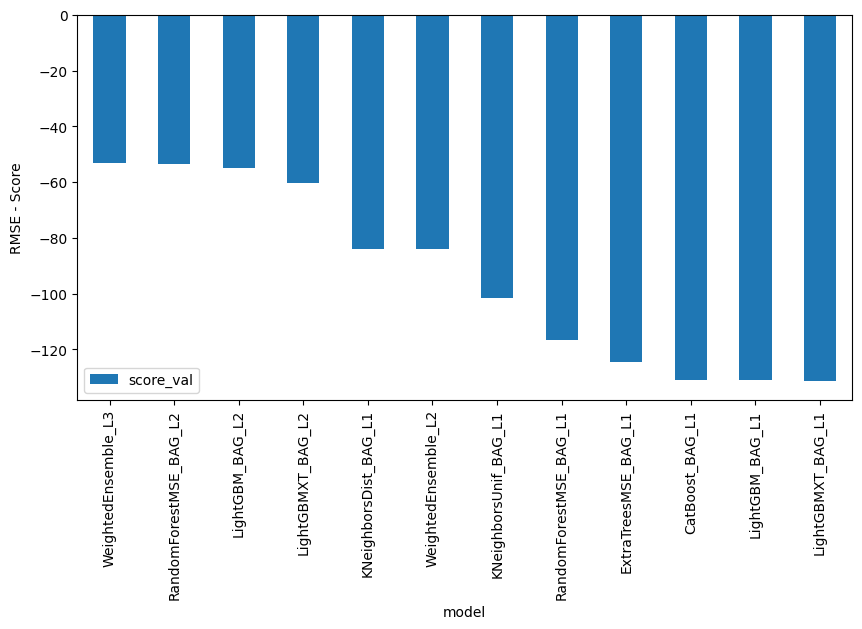

In [16]:
# visualise the result
fit_result_df.plot(kind="bar", x="model", y="score_val", figsize=(10, 5))
plt.ylabel('RMSE - Score')
plt.show()

### Create predictions from test dataset

In [17]:
predictions = predictor.predict(test)
predictions.head()

0    23.462053
1    41.980202
2    45.818241
3    49.472591
4    51.958195
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [18]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.314590
std        89.760811
min         2.877433
25%        19.590525
50%        64.136765
75%       167.350616
max       368.391327
Name: count, dtype: float64

In [19]:
# How many negative values do we have?
negative_count = (predictions < 0).sum()
print("Number of negative values:", negative_count)

Number of negative values: 0


In [20]:
# If negatice found Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [21]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [22]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 516kB/s]  
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [23]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                            date                 description             status    publicScore  privateScore  
----------------------------------  -------------------  ----------------------  --------  -----------  ------------  
submission.csv                      2023-10-09 09:04:37  first raw submission    complete  1.80601      1.80601       
submission_new_hpo.csv              2023-10-08 17:51:02  hyperparameters tuning  complete  0.52102      0.52102       
submission_feature_engineering.csv  2023-10-08 17:41:29  feature engineering     complete  0.55095      0.55095       
submission_new_features.csv         2023-10-08 17:29:39  new features            complete  0.46903      0.46903       


#### Initial score of 1.80601

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

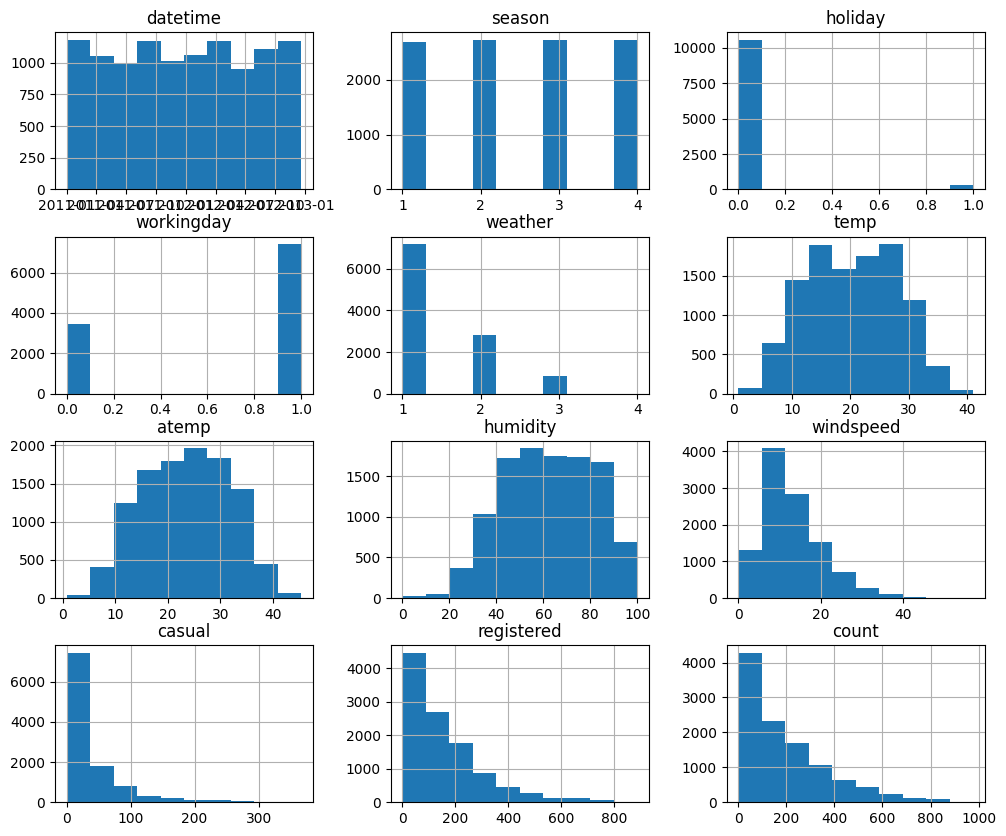

In [24]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize = (12, 10));

<ipython-input-38-f1188b3f946c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True);


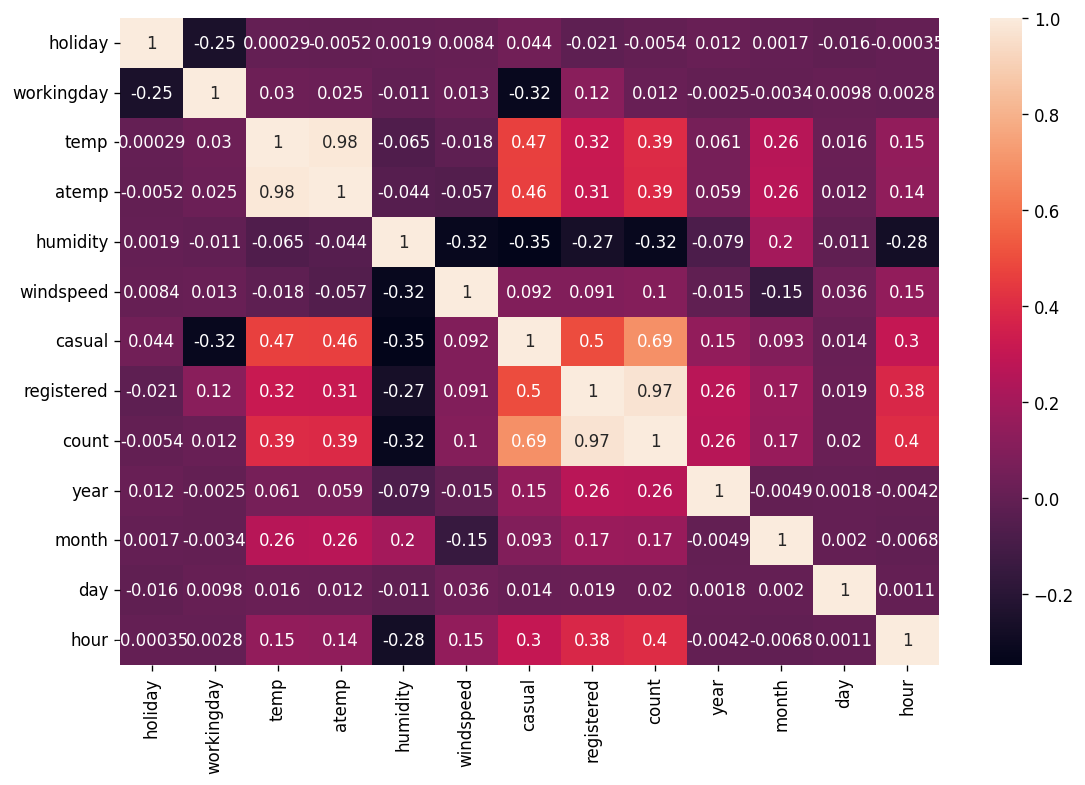

In [38]:
# correlation heatmap
plt.figure(figsize = (11,7), dpi=120)
sns.heatmap(train.corr(), annot = True);

In [32]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train.drop(['datetime'], axis = 1, inplace = True)

In [33]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test.drop(['datetime'], axis = 1, inplace = True)

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [34]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [35]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


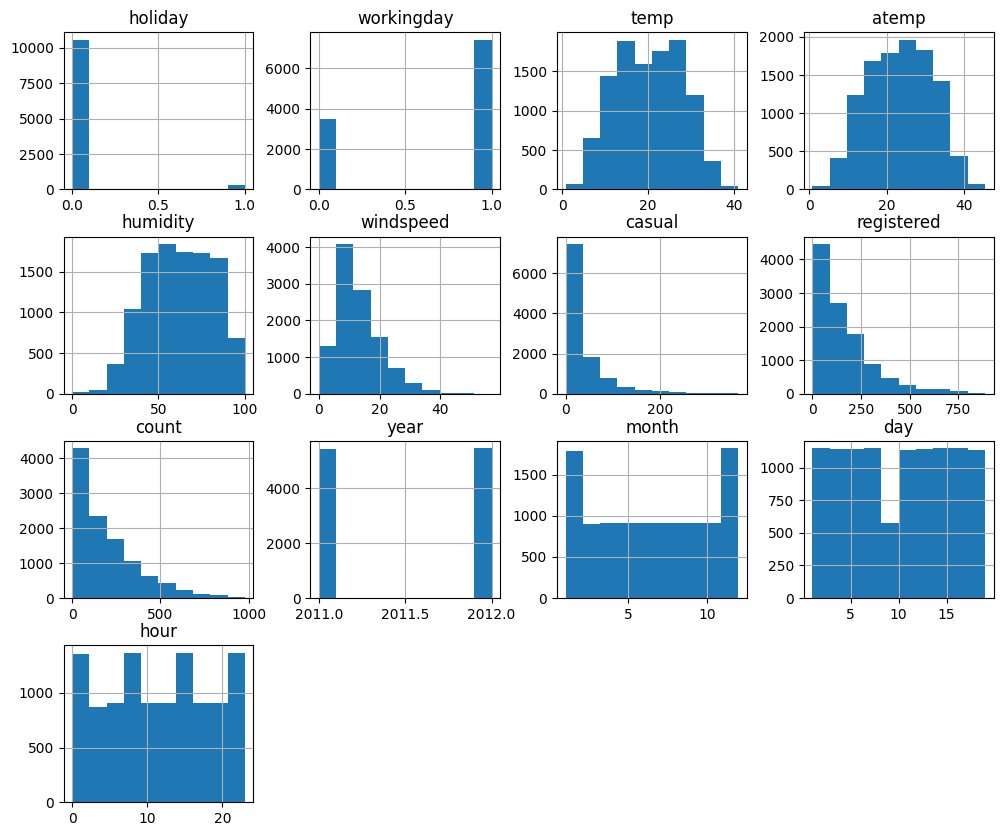

In [36]:
# View histogram of all features again now with the hour feature
train.hist(figsize = (12, 10));

<Axes: xlabel='year', ylabel='count'>

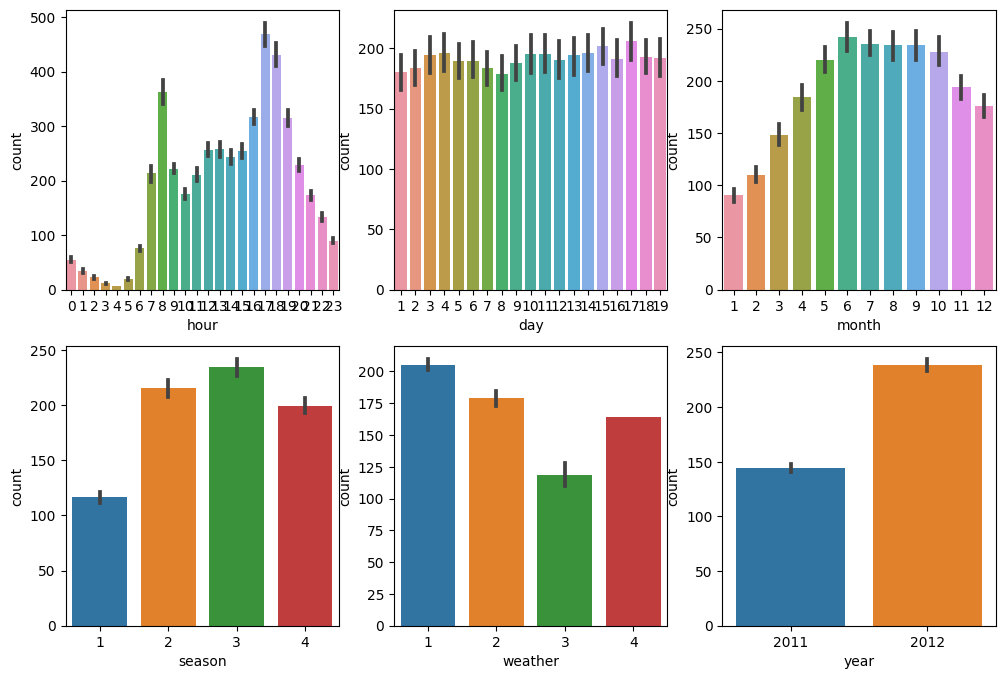

In [44]:
fig, ax = plt.subplots(2, 3, figsize = (12, 8))
sns.barplot(x="hour",y="count",data=train, ax = ax[0][0])
sns.barplot(x="day",y="count",data=train, ax = ax[0][1])
sns.barplot(x="month",y="count",data=train, ax = ax[0][2])
sns.barplot(x="season",y="count",data=train, ax = ax[1][0])
sns.barplot(x="weather",y="count",data=train, ax = ax[1][1])
sns.barplot(x="year",y="count",data=train, ax = ax[1][2])

## Step 5: Rerun the model with the same settings as before, just with more features

In [45]:
predictor_new_features = TabularPredictor(label="count",  problem_type = 'regression', eval_metric='root_mean_squared_error',
                                          learner_kwargs={'ignored_columns': ignored_columns}).fit(train_data=train,
                                                 time_limit=600,
                                                 presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20231009_094338/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20231009_094338/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   208.24 GB / 242.49 GB (85.9%)
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10521.37 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_i

In [46]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -35.959506      57.136927  371.745842                0.005763           3.647266            2       True          8
1      WeightedEnsemble_L3  -35.980932      61.402868  512.271856                0.001465           0.660816            3       True         13
2          LightGBM_BAG_L2  -36.348518      59.915282  420.289788                0.162271          37.877558            2       True         10
3          CatBoost_BAG_L2  -36.368448      60.060253  427.939540                0.307241          45.527309            2       True         12
4   RandomForestMSE_BAG_L2  -36.710412      60.931891  428.206173                1.178879          45.793942            2       True         11
5        LightGBMXT_BAG_L1  -37.097828      48.631433  154.104410         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -123.93326033133259,
  'KNeighborsDist_BAG_L1': -119.36560130583281,
  'LightGBMXT_BAG_L1': -37.09782821469706,
  'LightGBM_BAG_L1': -37.69285008347106,
  'RandomForestMSE_BAG_L1': -42.15060121046798,
  'CatBoost_BAG_L1': -40.855930628261774,
  'ExtraTree

In [47]:
# Leaderboard dataframe
new_fit_result_df = pd.DataFrame(predictor_new_features.leaderboard(silent=True))
new_fit_result_df.head(10)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-35.959506,57.136927,371.745842,0.005763,3.647266,2,True,8
1,WeightedEnsemble_L3,-35.980932,61.402868,512.271856,0.001465,0.660816,3,True,13
2,LightGBM_BAG_L2,-36.348518,59.915282,420.289788,0.162271,37.877558,2,True,10
3,CatBoost_BAG_L2,-36.368448,60.060253,427.939540,0.307241,45.527309,2,True,12
4,RandomForestMSE_BAG_L2,-36.710412,60.931891,428.206173,1.178879,45.793942,2,True,11
5,LightGBMXT_BAG_L1,-37.097828,48.631433,154.104410,48.631433,154.104410,1,True,3
6,LightGBMXT_BAG_L2,-37.184434,60.485728,424.186863,0.732716,41.774632,2,True,9
7,LightGBM_BAG_L1,-37.692850,7.588043,70.320579,7.588043,70.320579,1,True,4
8,CatBoost_BAG_L1,-40.855931,0.258834,126.670265,0.258834,126.670265,1,True,6
9,ExtraTreesMSE_BAG_L1,-41.612697,1.993521,14.207585,1.993521,14.207585,1,True,7


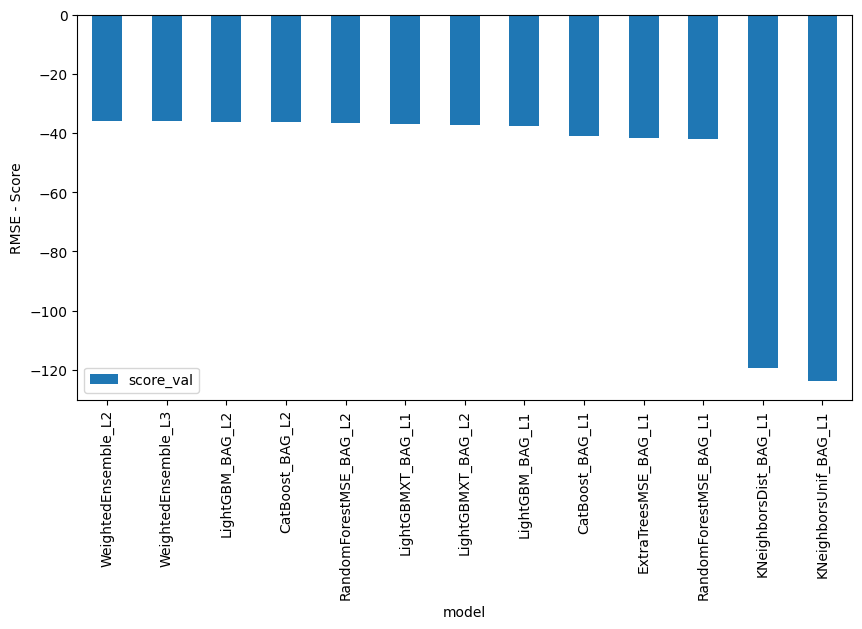

In [53]:
# visualise the result
new_fit_result_df.plot(kind="bar", x="model", y="score_val", figsize=(10, 5))
plt.ylabel('RMSE - Score')
plt.show()

In [48]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    14.605417
1     1.319564
2    -0.756958
3     2.579263
4     1.961250
Name: count, dtype: float32

In [49]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features < 0] = 0

In [50]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [51]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 187k/187k [00:00<00:00, 507kB/s]  
Successfully submitted to Bike Sharing Demand

In [52]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                            date                 description             status    publicScore  privateScore  
----------------------------------  -------------------  ----------------------  --------  -----------  ------------  
submission_new_features.csv         2023-10-09 09:58:43  new features            complete  0.56283      0.56283       
submission.csv                      2023-10-09 09:04:37  first raw submission    complete  1.80601      1.80601       
submission_new_hpo.csv              2023-10-08 17:51:02  hyperparameters tuning  complete  0.52102      0.52102       
submission_feature_engineering.csv  2023-10-08 17:41:29  feature engineering     complete  0.55095      0.55095       


#### New Score of 0.56283


# Feature Engineering

## Step 6: Rerun the model with the same settings as before, just with more features

In [54]:
# create a new feature
train['temp_humidity_interaction'] = train['temp'] * train['humidity']
test['temp_humidity_interaction'] = test['temp'] * test['humidity']

In [55]:
predictor_feature_engineering = TabularPredictor(label="count",  problem_type = 'regression', eval_metric='root_mean_squared_error',
                                                 learner_kwargs={'ignored_columns': ignored_columns}).fit(train_data=train,
                                                 time_limit=600,
                                                 presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20231009_100131/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20231009_100131/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   207.27 GB / 242.49 GB (85.5%)
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10494.11 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_i

In [56]:
predictor_feature_engineering.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -35.959506      57.136927  371.745842                0.005763           3.647266            2       True          8
1      WeightedEnsemble_L3  -35.980932      61.402868  512.271856                0.001465           0.660816            3       True         13
2          LightGBM_BAG_L2  -36.348518      59.915282  420.289788                0.162271          37.877558            2       True         10
3          CatBoost_BAG_L2  -36.368448      60.060253  427.939540                0.307241          45.527309            2       True         12
4   RandomForestMSE_BAG_L2  -36.710412      60.931891  428.206173                1.178879          45.793942            2       True         11
5        LightGBMXT_BAG_L1  -37.097828      48.631433  154.104410         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -123.93326033133259,
  'KNeighborsDist_BAG_L1': -119.36560130583281,
  'LightGBMXT_BAG_L1': -37.09782821469706,
  'LightGBM_BAG_L1': -37.69285008347106,
  'RandomForestMSE_BAG_L1': -42.15060121046798,
  'CatBoost_BAG_L1': -40.855930628261774,
  'ExtraTree

In [57]:
# Leaderboard dataframe
new_feature_fit_result_df = pd.DataFrame(predictor_feature_engineering.leaderboard(silent=True))
new_feature_fit_result_df.head(10)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-35.962630,46.619755,525.354859,0.001376,0.524291,3,True,12
1,WeightedEnsemble_L2,-36.120066,45.203392,376.540840,0.001120,0.625737,2,True,7
2,CatBoost_BAG_L2,-36.316883,45.633918,447.510076,0.173691,71.445349,2,True,11
3,LightGBM_BAG_L2,-36.512861,45.697506,407.648735,0.237278,31.584008,2,True,9
4,RandomForestMSE_BAG_L2,-36.622105,46.207410,421.801211,0.747183,45.736483,2,True,10
5,LightGBMXT_BAG_L1,-37.161161,38.092181,209.461600,38.092181,209.461600,1,True,3
6,LightGBMXT_BAG_L2,-37.344972,46.230274,411.246178,0.770046,35.181450,2,True,8
7,LightGBM_BAG_L1,-38.180363,5.928979,74.833812,5.928979,74.833812,1,True,4
8,CatBoost_BAG_L1,-42.086903,0.285927,75.118443,0.285927,75.118443,1,True,6
9,RandomForestMSE_BAG_L1,-42.369609,0.895185,16.501249,0.895185,16.501249,1,True,5


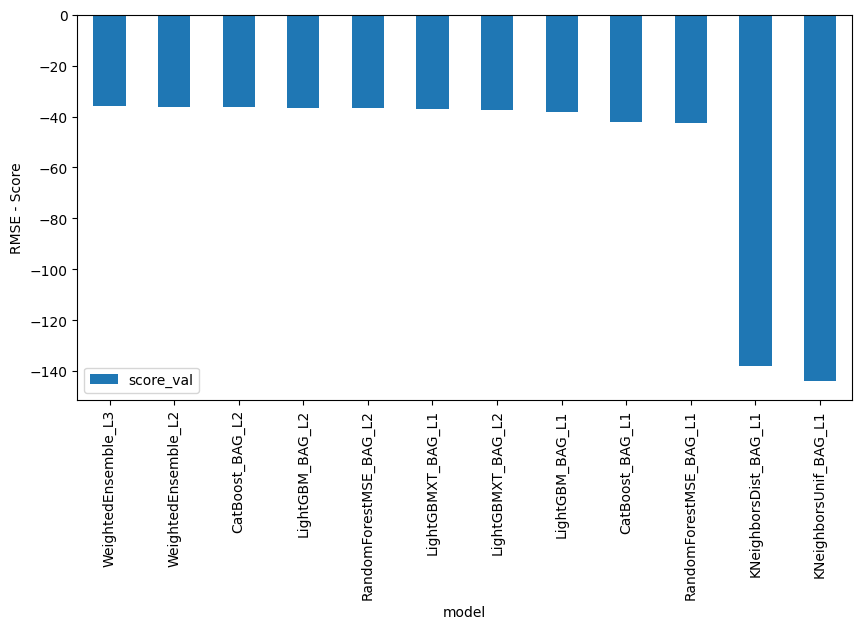

In [58]:
# visualise the result
new_feature_fit_result_df.plot(kind="bar", x="model", y="score_val", figsize=(10, 5))
plt.ylabel('RMSE - Score')
plt.show()

In [59]:
predictions_feature_engineering = predictor_feature_engineering.predict(test)
predictions_feature_engineering.head()

0    12.445000
1     6.072911
2     5.402641
3     5.063633
4     4.751734
Name: count, dtype: float32

In [60]:
# Remember to set all negative values to zero
predictions_feature_engineering[predictions_feature_engineering < 0] = 0

In [61]:
# Same submitting predictions
submission_feature_engineering = submission.copy()
submission_feature_engineering["count"] = predictions_feature_engineering
submission_feature_engineering.to_csv("submission_feature_engineering.csv", index=False)

In [62]:
!kaggle competitions submit -c bike-sharing-demand -f submission_feature_engineering.csv -m "feature engineering"

100% 188k/188k [00:00<00:00, 724kB/s]  
Successfully submitted to Bike Sharing Demand

In [63]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                            date                 description             status    publicScore  privateScore  
----------------------------------  -------------------  ----------------------  --------  -----------  ------------  
submission_feature_engineering.csv  2023-10-09 10:14:50  feature engineering     complete  0.46532      0.46532       
submission_new_features.csv         2023-10-09 09:58:43  new features            complete  0.56283      0.56283       
submission.csv                      2023-10-09 09:04:37  first raw submission    complete  1.80601      1.80601       
submission_new_hpo.csv              2023-10-08 17:51:02  hyperparameters tuning  complete  0.52102      0.52102       


#### New Score of 0.46532


## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [64]:
import autogluon.core as ag
hyperparameter_gbm = [{'extra_trees': True,
                'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

hyperparameters = {
                   'GBM': hyperparameter_gbm
                  }

In [65]:
predictor_new_hpo = TabularPredictor(label="count",
                                     problem_type = 'regression',
                                     eval_metric='root_mean_squared_error',
                                     learner_kwargs={'ignored_columns': ignored_columns}).fit(train_data=train,
                                                                                  time_limit=600,
                                                                                  presets="best_quality",
                                                                                  hyperparameters=hyperparameters,
                                                                                  hyperparameter_tune_kwargs='auto')

No path specified. Models will be saved in: "AutogluonModels/ag-20231009_101614/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20231009_101614/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   206.56 GB / 242.49 GB (85.2%)
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11741.54 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_i

In [66]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L2 -36.942441       8.431718  283.195966                0.002133           0.618900            2       True          6
1    WeightedEnsemble_L3 -37.424392       8.431920  470.473443                0.001482           0.478756            3       True         12
2     LightGBM_BAG_L2/T1 -37.661208       8.429909  352.617282                0.000185          39.112720            2       True          9
3   LightGBMLarge_BAG_L1 -37.751674       8.429055  121.941791                8.429055         121.941791            1       True          5
4   LightGBMXT_BAG_L2/T2 -38.161683       8.429920  354.558350                0.000195          41.053787            2       True          8
5     LightGBM_BAG_L2/T2 -38.171510       8.429923  357.061851                0.000198      

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1/T1': -74.56239766212356,
  'LightGBMXT_BAG_L1/T2': -45.96388858379014,
  'LightGBMXT_BAG_L1/T3': -46.6297339472596,
  'LightGBM_BAG_L1/T1': -38.180363023856806,
  'LightGBMLarge_BAG_L1': -37.75167407014854,
  'WeightedEnsemble_L2': -36.94244075123185,
  'LightGBMXT_BAG_L2/T1': -38.83432013992777,
  'LightGB

In [67]:
# Leaderboard dataframe
hyo_fit_result_df = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True))
hyo_fit_result_df.head(10)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-36.942441,8.431718,283.195966,0.002133,0.618900,2,True,6
1,WeightedEnsemble_L3,-37.424392,8.431920,470.473443,0.001482,0.478756,3,True,12
2,LightGBM_BAG_L2/T1,-37.661208,8.429909,352.617282,0.000185,39.112720,2,True,9
3,LightGBMLarge_BAG_L1,-37.751674,8.429055,121.941791,8.429055,121.941791,1,True,5
4,LightGBMXT_BAG_L2/T2,-38.161683,8.429920,354.558350,0.000195,41.053787,2,True,8
5,LightGBM_BAG_L2/T2,-38.171510,8.429923,357.061851,0.000198,43.557289,2,True,10
6,LightGBM_BAG_L1/T1,-38.180363,0.000174,79.130332,0.000174,79.130332,1,True,4
7,LightGBMLarge_BAG_L2,-38.388654,8.722751,360.958463,0.293026,47.453900,2,True,11
8,LightGBMXT_BAG_L2/T1,-38.834320,8.429860,346.270890,0.000135,32.766328,2,True,7
9,LightGBMXT_BAG_L1/T2,-45.963889,0.000173,39.259774,0.000173,39.259774,1,True,2


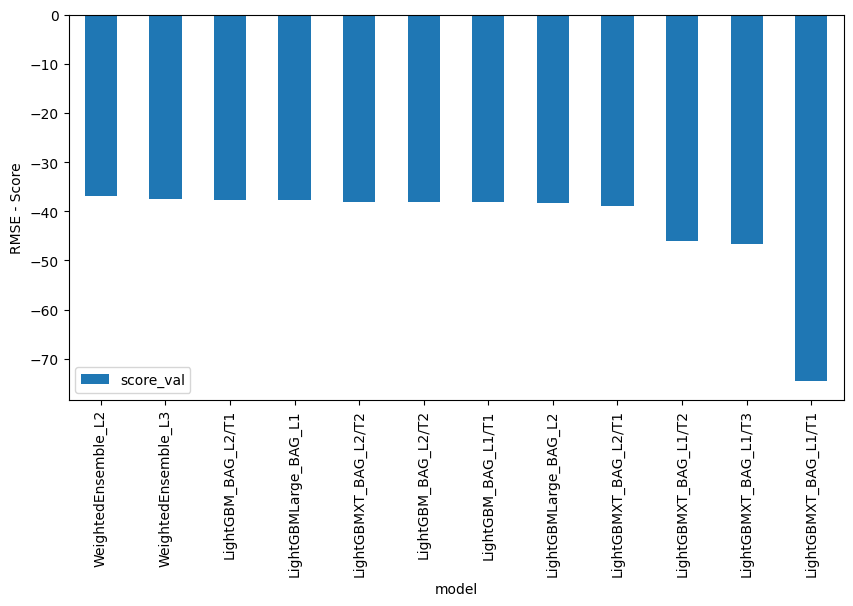

In [68]:
# visualise the result
hyo_fit_result_df.plot(kind="bar", x="model", y="score_val", figsize=(10, 5))
plt.ylabel('RMSE - Score')
plt.show()

In [69]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    14.587756
1    -0.264882
2    -2.595933
3    -0.042919
4    -0.080695
Name: count, dtype: float32

In [70]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [71]:
# Same submitting predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [72]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "hyperparameters tuning"

100% 188k/188k [00:00<00:00, 665kB/s]  
Successfully submitted to Bike Sharing Demand

In [73]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                            date                 description             status    publicScore  privateScore  
----------------------------------  -------------------  ----------------------  --------  -----------  ------------  
submission_new_hpo.csv              2023-10-09 10:28:22  hyperparameters tuning  complete  0.53087      0.53087       
submission_feature_engineering.csv  2023-10-09 10:14:50  feature engineering     complete  0.46532      0.46532       
submission_new_features.csv         2023-10-09 09:58:43  new features            complete  0.56283      0.56283       
submission.csv                      2023-10-09 09:04:37  first raw submission    complete  1.80601      1.80601       


#### New Score of 0.53087

# Exp 2 - Hyperparameter Optimisation

In [77]:
import autogluon.core as ag
hyperparameter_xgb = [{'objective': 'reg:squarederror',
                'eval_metric': 'rmse',
                'max_depth':ag.space.Int(lower=5, upper=8, default=6),
                'n_estimators': ag.space.Int(lower=100, upper=500, default=100),
                'eta':.3,
                'subsample': 1,
                'colsample_bytree': 1}]

xgb_hyperparameters = {
                   'XGB': hyperparameter_xgb,
                  }

In [79]:
predictor_new_hpo2 = TabularPredictor(label="count",
                                     problem_type = 'regression',
                                     eval_metric='root_mean_squared_error',
                                     learner_kwargs={'ignored_columns': ignored_columns}).fit(train_data=train,
                                                                                  time_limit=600,
                                                                                  presets="best_quality",
                                                                                  hyperparameters=xgb_hyperparameters,
                                                                                  hyperparameter_tune_kwargs='auto')

No path specified. Models will be saved in: "AutogluonModels/ag-20231009_104104/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20231009_104104/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 11:19:59 UTC 2023
Disk Space Avail:   206.26 GB / 242.49 GB (85.1%)
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11507.89 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_i

In [80]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2 -38.392142       0.002190  156.544251                0.001381           0.748879            2       True         10
1     XGBoost_BAG_L2/T4 -39.066705       0.002250  355.502090                0.000179          28.483350            2       True         14
2   WeightedEnsemble_L3 -39.066705       0.003590  356.098458                0.001340           0.596369            3       True         17
3     XGBoost_BAG_L1/T8 -39.174248       0.000160   45.165267                0.000160          45.165267            1       True          8
4     XGBoost_BAG_L2/T5 -39.428409       0.002265  372.607163                0.000194          45.588424            2       True         15
5     XGBoost_BAG_L1/T3 -39.509721       0.000189   38.294435                0.000189          38.

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T3': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T4': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T5': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T6': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T7': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T8': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T9': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T3': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T4': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T5': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T6': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'XGBoost_BAG_L1/T1': -42.75500981593

In [81]:
# Leaderboard dataframe
hyo2_fit_result_df = pd.DataFrame(predictor_new_hpo2.leaderboard(silent=True))
hyo2_fit_result_df.head(10)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-38.392142,0.002190,156.544251,0.001381,0.748879,2,True,10
1,XGBoost_BAG_L2/T4,-39.066705,0.002250,355.502090,0.000179,28.483350,2,True,14
2,WeightedEnsemble_L3,-39.066705,0.003590,356.098458,0.001340,0.596369,3,True,17
3,XGBoost_BAG_L1/T8,-39.174248,0.000160,45.165267,0.000160,45.165267,1,True,8
4,XGBoost_BAG_L2/T5,-39.428409,0.002265,372.607163,0.000194,45.588424,2,True,15
5,XGBoost_BAG_L1/T3,-39.509721,0.000189,38.294435,0.000189,38.294435,1,True,3
6,XGBoost_BAG_L2/T2,-39.523485,0.003612,368.875548,0.001541,41.856809,2,True,12
7,XGBoost_BAG_L2/T1,-39.583206,0.002240,354.676749,0.000169,27.658010,2,True,11
8,XGBoost_BAG_L2/T6,-39.808860,0.002281,369.866792,0.000210,42.848053,2,True,16
9,XGBoost_BAG_L2/T3,-39.953457,0.002331,375.265394,0.000259,48.246655,2,True,13


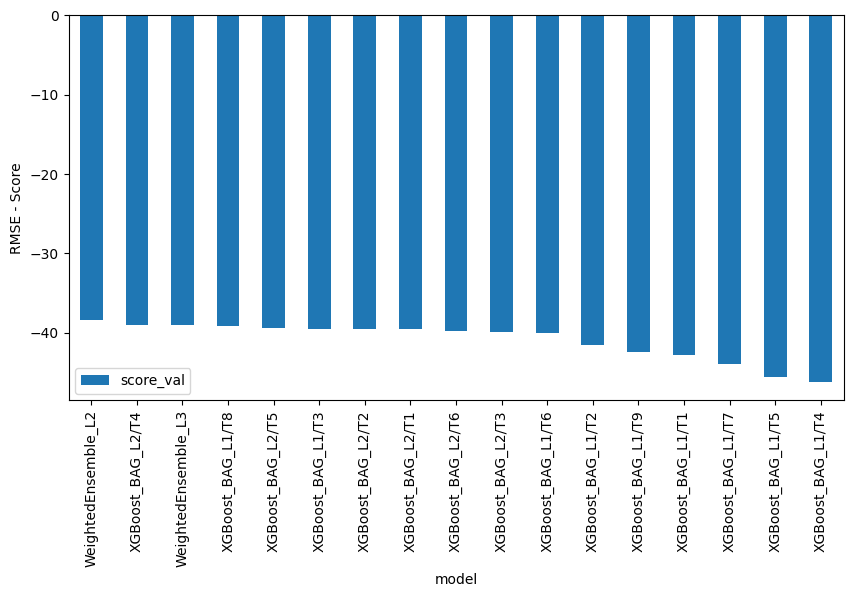

In [82]:
# visualise the result
hyo2_fit_result_df.plot(kind="bar", x="model", y="score_val", figsize=(10, 5))
plt.ylabel('RMSE - Score')
plt.show()

In [83]:
predictions_new_hpo2 = predictor_new_hpo2.predict(test)
predictions_new_hpo2.head()

0    9.393315
1    0.201565
2   -0.792696
3   -0.457364
4   -0.403715
Name: count, dtype: float32

In [84]:
# Remember to set all negative values to zero
predictions_new_hpo2[predictions_new_hpo2 < 0] = 0

In [85]:
# Same submitting predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = predictions_new_hpo2
submission_new_hpo.to_csv("submission_new_hpo2.csv", index=False)

In [86]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "hyperparameters tuning 2"

100% 188k/188k [00:00<00:00, 233kB/s]  
Successfully submitted to Bike Sharing Demand

In [87]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                            date                 description               status    publicScore  privateScore  
----------------------------------  -------------------  ------------------------  --------  -----------  ------------  
submission_new_hpo.csv              2023-10-09 11:29:26  hyperparameters tuning 2  complete  0.53087      0.53087       
submission_new_hpo.csv              2023-10-09 10:28:22  hyperparameters tuning    complete  0.53087      0.53087       
submission_feature_engineering.csv  2023-10-09 10:14:50  feature engineering       complete  0.46532      0.46532       
submission_new_features.csv         2023-10-09 09:58:43  new features              complete  0.56283      0.56283       


#### New Score of 0.53087

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

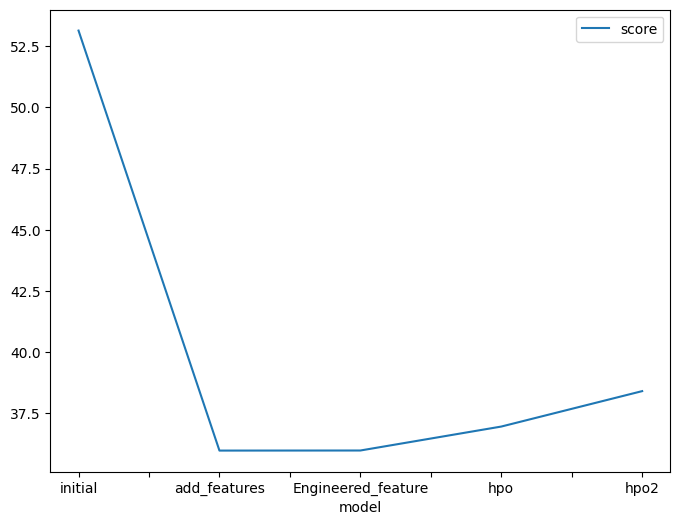

In [88]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "Engineered_feature", "hpo", "hpo2"],
        "score": [53.143797, 35.959506, 35.962630, 36.942441, 38.392142]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

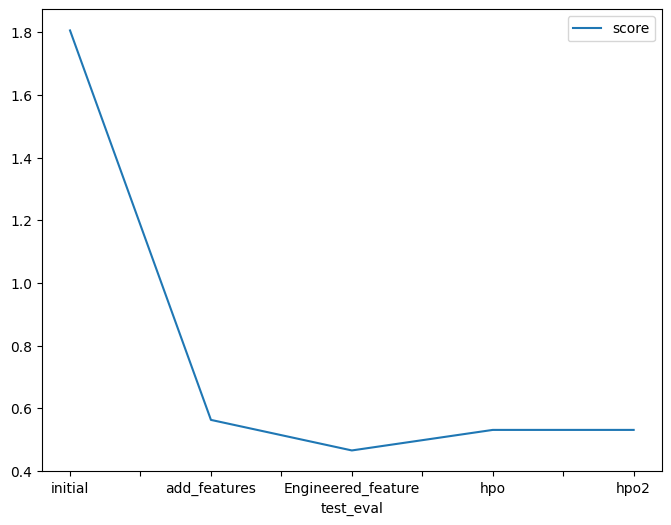

In [89]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features","Engineered_feature", "hpo", "hpo2"],
        "score": [1.80601, 0.56283, 0.46532, 0.53087, 0.53087]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [95]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "Engineered_feature", "hpo"],
    "hpo1": ["default_values", "default_values","default_values", "GBM - Best model"],
    "hpo2": ["default_values", "default_values","default_values", "xgb"],
    "score": [1.80601, 0.56283, 0.46532, 0.53087]
})

,model,hpo1,hpo2,score
0,initial,default_values,default_values,1.80601
1,add_features,default_values,default_values,0.56283
2,Engineered_feature,default_values,default_values,0.46532
3,hpo,GBM - Best model,xgb,0.53087


Final Result:

The best model was WeightedEnsemble_L3 with add features + engineered feature dataset, with a validation RMSE score of 35.962630. The best Kaggle test score is 0.46432.